In [1]:
""" 
Billy Hatcher scoreboards, turned into plots with score/clear time/rank
(jupyter notebook put together by fleedle_deedle, 15 Dec 2021)

Google Sheet (the CSV) with all the most recent scoreboard data: 
https://docs.google.com/spreadsheets/d/1EPOkUzAVbZkwTmy9fTVmbnpnm5Eh7poHXCw-IXjz904/edit?usp=sharing

This code imports all the data on the "Mission Result" screen 
from a CSV and puts it into a DataFrame. This lets us pull specific 
columns of the data by name. 

In this case, I pulled Clear Time and Total Score, which I believe  
are the only things that decide Rank in each mission. I plotted 
these for each mission separately. I hope this makes it easier to see 
which missions are "hard" to S rank or are easy to get enough points  
on.

The next addition I want to make to the plots is a "staircase" of 
acceptable scores you can have when you are expecting a certain  
Clear Time. This would be drawing horizontal lines from right to  
left on the plot for the lowest-score S rank at the highest time. 
The horizontal line would turn down when there is an S rank below it 
(lower score & lower time S rank), then the "stairs" would keep being 
drawn from right to left. For example, a staircase on the Forest 1 
plot would have stairs on scores 8100, 6800, and 4200. 

I could definitely make this code much cleaner with a Python loop
and/or a function or two, using an array of all the mission names.
[Forest 1, Forest 2, Forest 3, Forest 4, Forest 5, Forest 6, Forest 7, Forest 8, Pirate 1, Pirate 2, Pirate 3, Pirate 4, Pirate 5, Pirate 6, Pirate 7, Pirate 8, Dino 1, Dino 2, Dino 3, Dino 4, Dino 5, Dino 6, Dino 7, Dino 8, Blizzard 1, Blizzard 2, Blizzard 3, Blizzard 4, Blizzard 5, Blizzard 6, Blizzard 7, Blizzard 8, Circus 1, Circus 2, Circus 3, Circus 4, Circus 5, Circus 6, Circus 7, Circus 8, Sand 1, Sand 2, Sand 3, Sand 4, Sand 5, Sand 6, Sand 7, Sand 8, Giant Palace 1, Giant Palace 2, Giant Palace 3, Giant Palace 4, Giant Palace 5, Giant Palace 6, Giant Palace 7, Giant Palace 8]

It would also be good to have 1 or 2 non-S ranks for every mission in
the CSV so that it plots properly and I don't have to forget about
which lines have the data replotted from the previous plot.
""";

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd
import matplotlib.dates as mdates    # needed for x-axis tick formatting

from datetime import datetime
from datetime import timedelta

In [3]:
# import Forest Village scoreboard + rank data
# sometimes getting rid of 'Mission' header above Forest 1, etc works
# else labels are 1 off or putting header back in also is 1 off
scoreboards = pd.read_csv('all-levels.csv')
scoreboards.head()

,Mission,Rank,Total Score,Clear Time,Enemy Score,Egg Score,Combo Bonus,Mission Bonus,Defeated,Hatched,Driver,Dunk,Shoot,Tame,Hatch
0,Forest 1,D,1100.0,01:20.28,900.0,200.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Forest 1,C,1700.0,01:26.35,1500.0,200.0,0.0,0.0,10.0,1.0,0.0,1.0,0.0,0.0,1.0
2,Forest 1,D,800.0,01:26.44,600.0,200.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Forest 1,S,4200.0,01:29.36,3500.0,200.0,500.0,0.0,14.0,1.0,0.0,0.0,3.0,0.0,1.0
4,Forest 1,B,2500.0,01:39.21,2300.0,200.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# copy missions column for index of DataFrame
missionsIndex = scoreboards['Mission'].values

# make a Series out of each column of the CSV
# use the mission names as the Index
ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)

In [5]:
# make a DataFrame with relevant data for plot out of a dictionary of the Series
df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})


In [6]:
ALL_LEVEL_NAMES = ['Forest 1', 'Forest 2', 'Forest 3', 'Forest 4', 'Forest 5', 'Forest 6', 'Forest 7', 'Forest 8',
 'Pirate 1', 'Pirate 2', 'Pirate 3', 'Pirate 4', 'Pirate 5', 'Pirate 6', 'Pirate 7', 'Pirate 8',
 'Dino 1', 'Dino 2', 'Dino 3', 'Dino 4', 'Dino 5', 'Dino 6', 'Dino 7', 'Dino 8',
 'Blizzard 1', 'Blizzard 2', 'Blizzard 3', 'Blizzard 4', 'Blizzard 5', 'Blizzard 6', 'Blizzard 7', 'Blizzard 8',
 'Circus 1', 'Circus 2', 'Circus 3', 'Circus 4', 'Circus 5', 'Circus 6', 'Circus 7', 'Circus 8',
 'Sand 1', 'Sand 2', 'Sand 3', 'Sand 4', 'Sand 5', 'Sand 6', 'Sand 7', 'Sand 8',
 'Palace 1', 'Palace 2', 'Palace 3', 'Palace 4', 'Palace 5', 'Palace 6', 'Palace 7', 'Palace 8']

ALL_FILE_NAMES = ['BH1-1-Forest1Ranks', 'BH1-2-Forest2Ranks', 'BH1-3-Forest3Ranks', 'BH1-4-Forest4Ranks', 
                 'BH1-5-Forest5Ranks', 'BH1-6-Forest6Ranks', 'BH1-7-Forest7Ranks', 'BH1-8-Forest8Ranks', 
                 'BH2-1-Pirate1Ranks', 'BH2-2-Pirate2Ranks', 'BH2-3-Pirate3Ranks', 'BH2-4-Pirate4Ranks', 
                 'BH2-5-Pirate5Ranks', 'BH2-6-Pirate6Ranks', 'BH2-7-Pirate7Ranks', 'BH2-8-Pirate8Ranks', 
                 'BH3-1-Dino1Ranks', 'BH3-2-Dino2Ranks', 'BH3-3-Dino3Ranks', 'BH3-4-Dino4Ranks', 
                 'BH3-5-Dino5Ranks', 'BH3-6-Dino6Ranks', 'BH3-7-Dino7Ranks', 'BH3-8-Dino8Ranks', 
                 'BH4-1-Blizzard1Ranks', 'BH4-2-Blizzard2Ranks', 'BH4-3-Blizzard3Ranks', 'BH4-4-Blizzard4Ranks', 
                 'BH4-5-Blizzard5Ranks', 'BH4-6-Blizzard6Ranks', 'BH4-7-Blizzard7Ranks', 'BH4-8-Blizzard8Ranks', 
                 'BH5-1-Circus1Ranks', 'BH5-2-Circus2Ranks', 'BH5-3-Circus3Ranks', 'BH5-4-Circus4Ranks', 
                 'BH5-5-Circus5Ranks', 'BH5-6-Circus6Ranks', 'BH5-7-Circus7Ranks', 'BH5-8-Circus8Ranks', 
                 'BH6-1-Sand1Ranks', 'BH6-2-Sand2Ranks', 'BH6-3-Sand3Ranks', 'BH6-4-Sand4Ranks', 
                 'BH6-5-Sand5Ranks', 'BH6-6-Sand6Ranks', 'BH6-7-Sand7Ranks', 'BH6-8-Sand8Ranks', 
                 'BH7-1-GiantPalace1Ranks', 'BH7-2-GiantPalace2Ranks', 'BH7-3-GiantPalace3Ranks', 'BH7-4-GiantPalace4Ranks', 
                 'BH7-5-GiantPalace5Ranks', 'BH7-6-GiantPalace6Ranks', 'BH7-7-GiantPalace7Ranks', 'BH7-8-GiantPalace8Ranks']

In [7]:
ALL_FILE_NAMES[8]

'BH2-1-Pirate1Ranks'

In [8]:
def plotLevel(df, LEVEL_NAME, FILE_NAME):
    "This makes a plot from the data for the specified level"

    # split DataFrame 
    # TODO: find the function that clears NaN rows
    sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
    notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                       ['Rank', 'Total Score', 'Clear Time']]
    
    # choose data for this plot (all scoreboards for 1 mission)
    dataS = sRanks.loc[LEVEL_NAME]
    dataNotS = notSRanks.loc[LEVEL_NAME]

    # make plots and adjust x-axis so time ticks are readable
    # TODO: make x-axis ticks readable, preferably every 30s labelled
    fig, ax = plt.subplots()

    # plot non-Sranks as blue circles
    # plot Sranks as red squares
    # plotting non-Sranks with ".values" breaks if there are 0 points
    ax.plot(pd.to_datetime(dataNotS['Clear Time']),
            dataNotS['Total Score'],
            'bo', label='Not S Rank')
    ax.plot(pd.to_datetime(dataS['Clear Time'].values),
            dataS['Total Score'].values,
            'rs', label='S Rank')


    # plot formatting struggle    
    plt.title(LEVEL_NAME+' Ranks')
    plt.xlabel('Clear Time')
    plt.ylabel('Total Score')

    plt.legend(numpoints = 1, frameon=True);
    ax.grid(True)

    # make x-axis tick labels work
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.get_xticklabels(), rotation=00, ha="center");

    fig.savefig('plots/'+FILE_NAME+'.png')

    # need to plt.show() to get ax.get_xticklabels() to work
    #plt.show()
    #ax.get_xticklabels()

/tmp/ipykernel_12808/3137065643.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


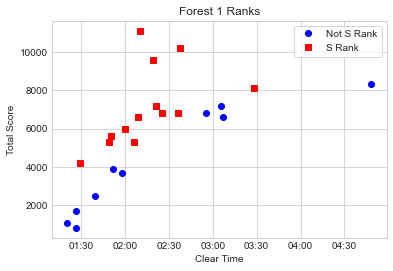

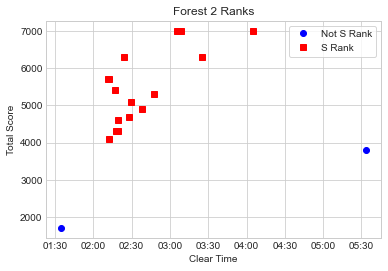

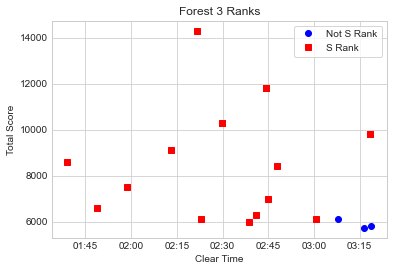

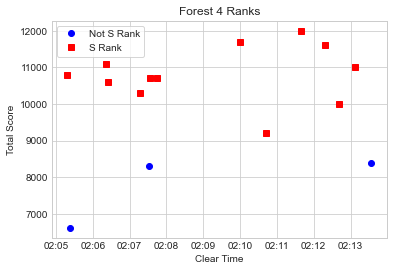

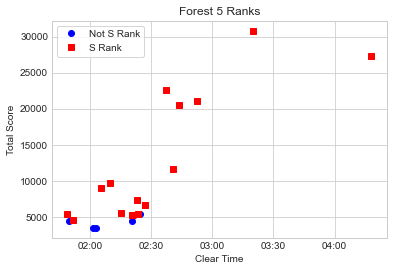

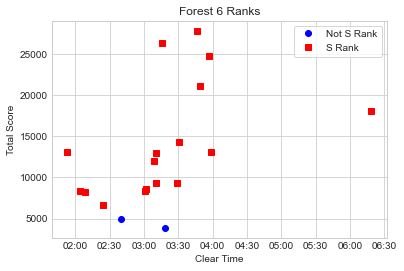

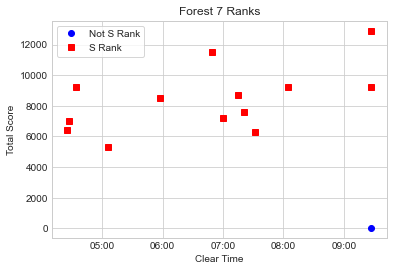

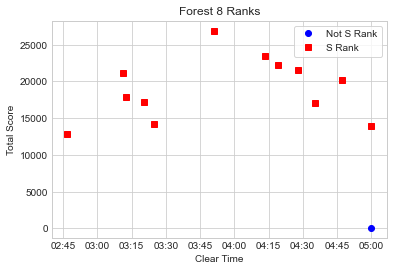

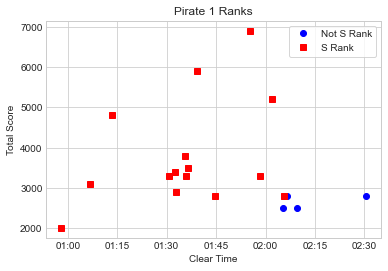

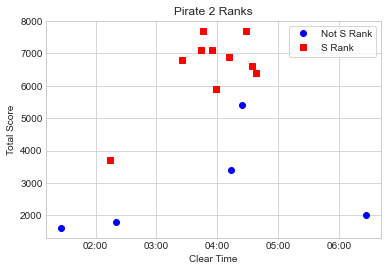

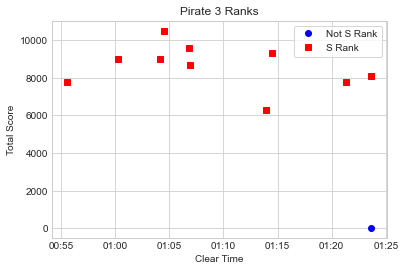

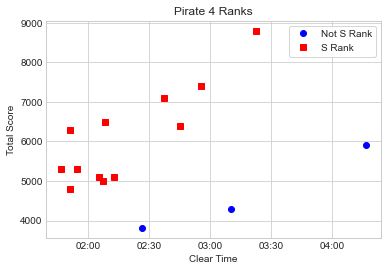

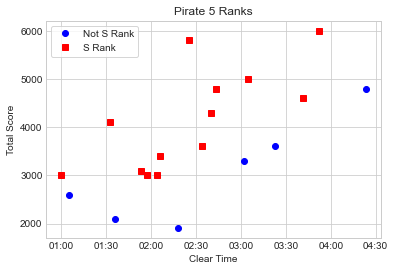

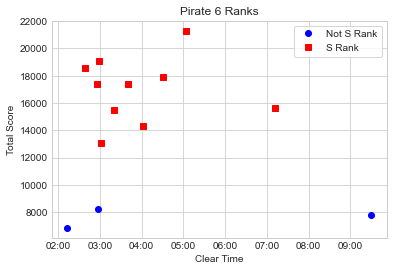

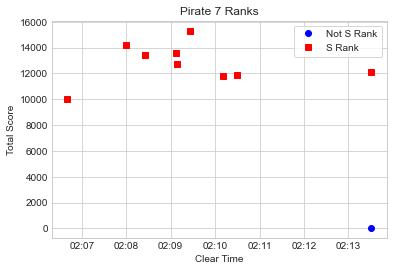

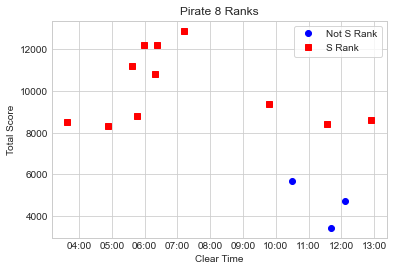

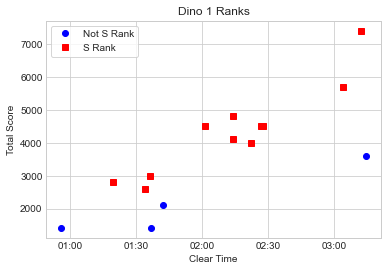

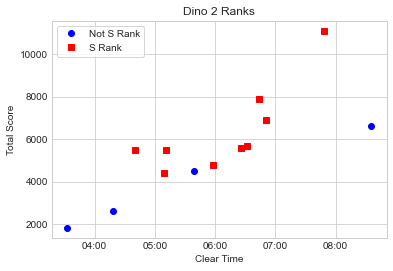

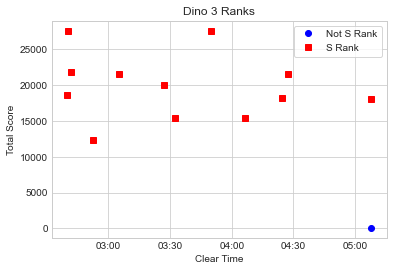

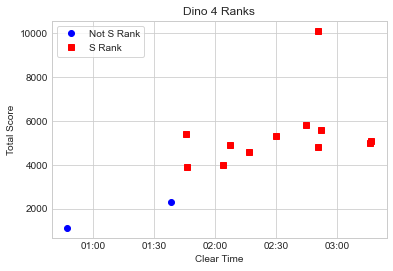

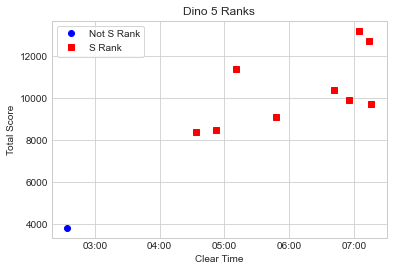

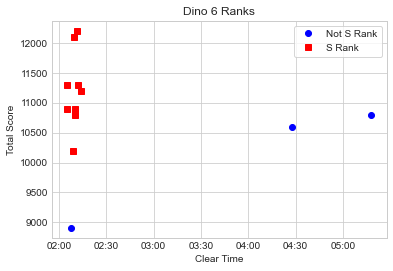

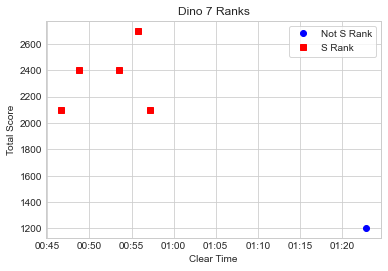

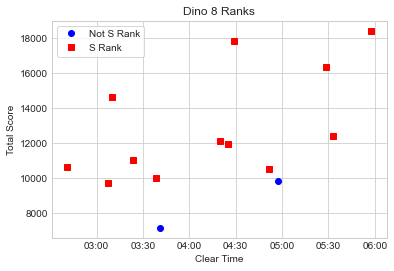

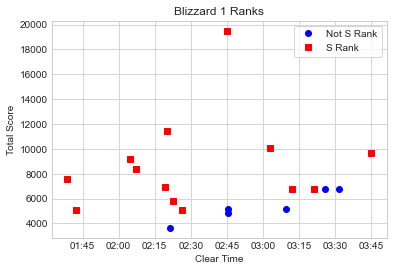

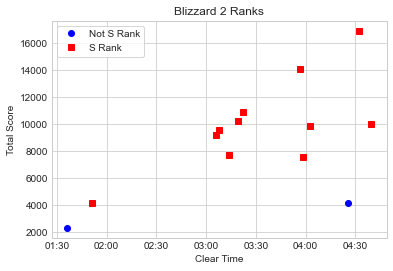

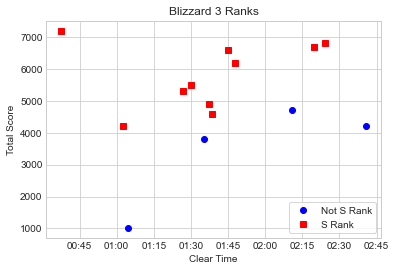

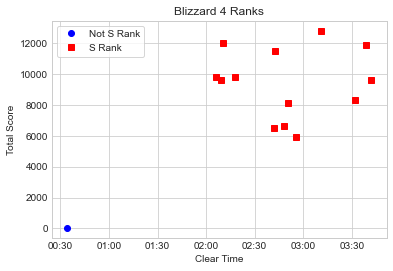

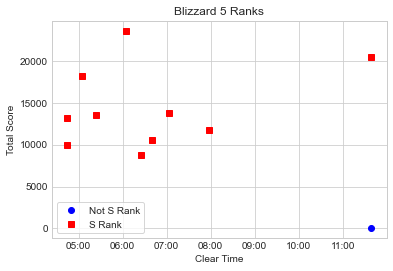

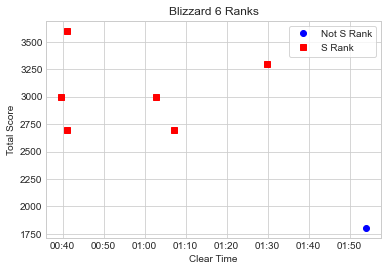

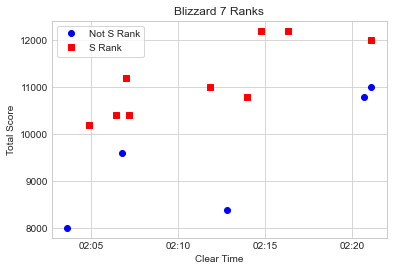

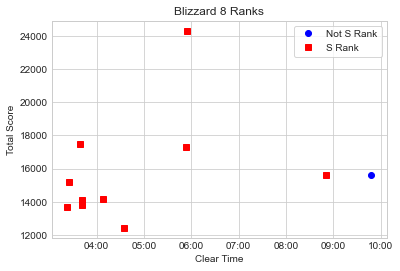

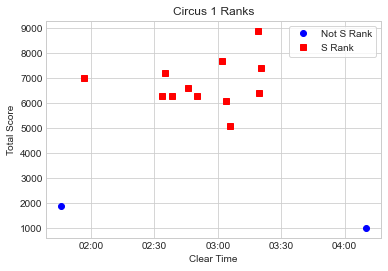

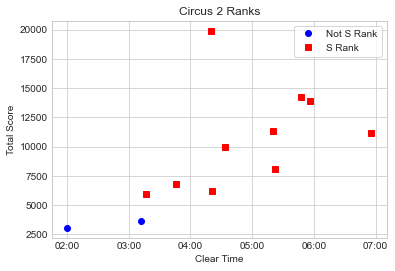

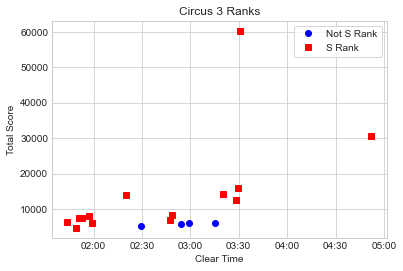

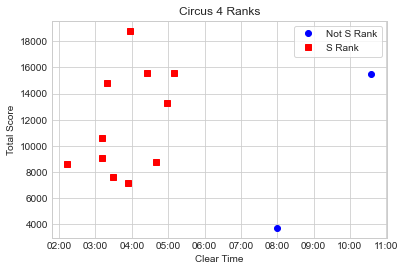

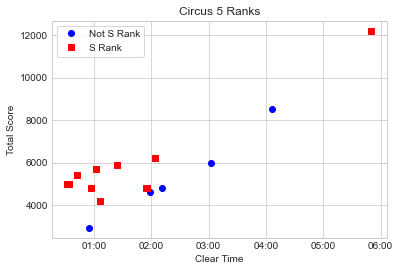

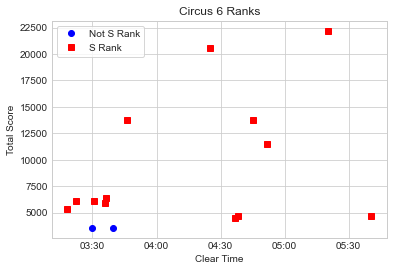

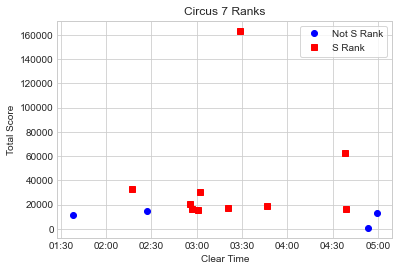

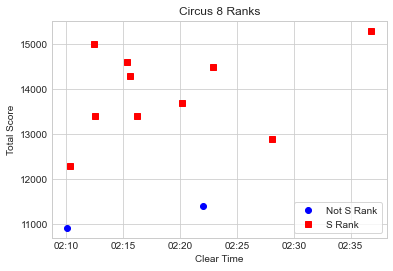

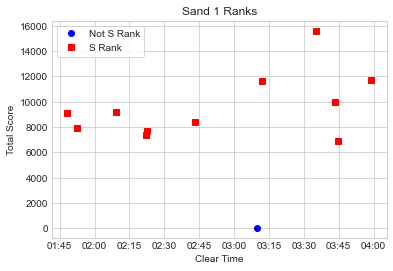

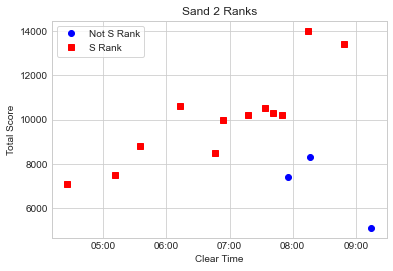

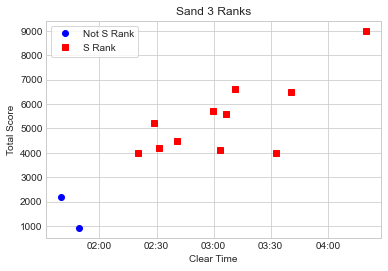

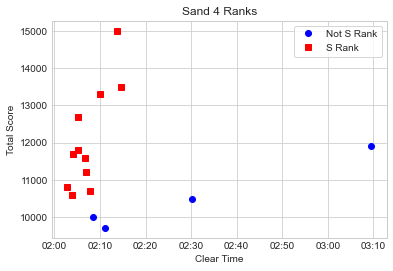

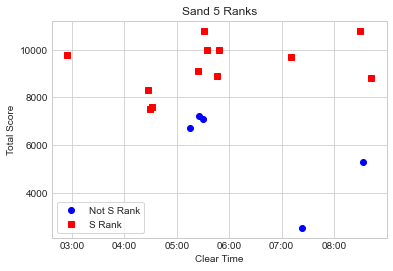

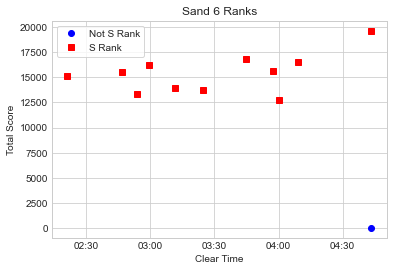

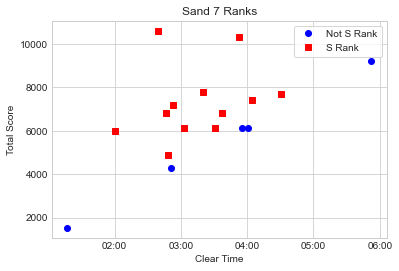

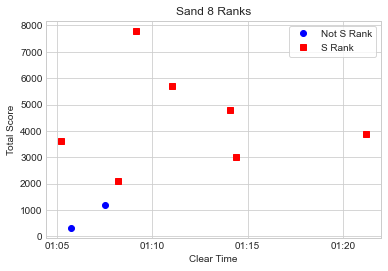

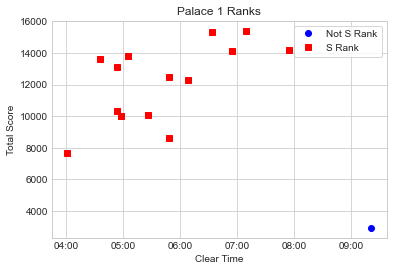

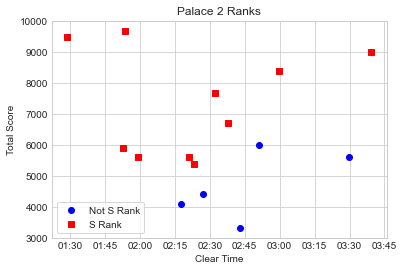

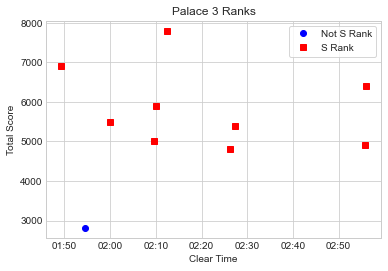

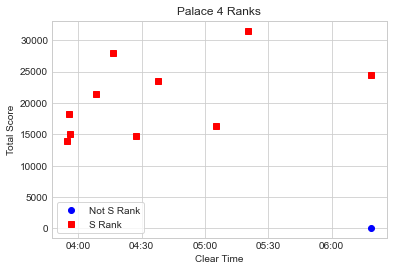

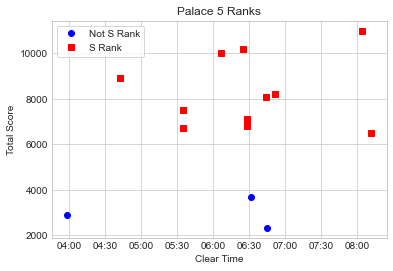

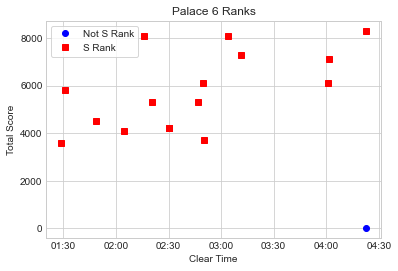

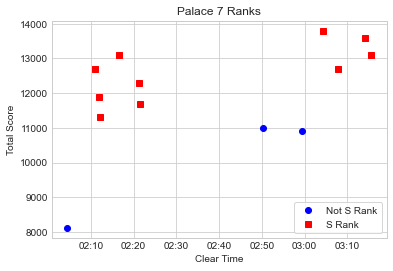

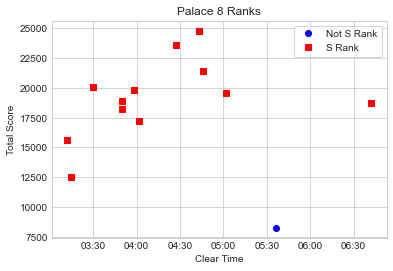

In [9]:
i = 0;
for level in ALL_LEVEL_NAMES:
    plotLevel(df, level, ALL_FILE_NAMES[i])
    i += 1;